## Gabriel Teixeira Lima Aracena & Alexander Crayton

## CST 425

### Import Data

In [130]:
import pandas as pd

df = pd.read_csv('data/Male-Teamsport-CMJ-Data.csv')

### Display Some Data

In [131]:
df.head()

,Name,ExternalId,Test Type,Date,Time,BW [KG],Reps,Tags,Additional Load [lb],Jump Height (Imp-Mom) [cm],...,Eccentric Mean Power / BM [W/kg],Flight Time:Contraction Time,Jump Height (Flight Time) [cm],Start of Braking Phase [s],Total Work [J],Concentric RFD - 100ms [N/s],Concentric RFD / BM [N/s/kg],Eccentric Braking RFD / BM [N/s/kg],Eccentric Peak Power / BM [W/kg],Eccentric:Concentric Duration [%]
0,Carter Young,NaN,CMJ,4/1/2024,9:34 AM,70.61,2,NaN,0,44.2,...,7.21,1.03,50.9,182.300,801.0,-3848.0,5.3,134.0,27.2,186.6
1,Dustin Crenshaw,NaN,CMJ,4/1/2024,9:34 AM,82.90,2,NaN,0,37.7,...,8.12,0.66,45.2,32.463,1112.0,-3155.0,0.0,56.0,24.2,208.5
2,Cooper Neville,NaN,CMJ,4/1/2024,9:33 AM,78.43,2,NaN,0,39.8,...,10.11,0.83,45.5,15.422,1046.0,-4710.0,17.5,93.0,31.5,162.4
3,Cade Verdusco,NaN,CMJ,4/1/2024,9:28 AM,78.99,1,NaN,0,42.9,...,5.72,0.94,47.1,16.105,812.0,918.0,37.6,104.0,17.2,244.0
4,Bryan Webb,NaN,CMJ,4/1/2024,9:28 AM,85.44,2,NaN,0,44.9,...,7.05,1.24,50.0,22.628,877.0,-3716.0,33.9,203.0,36.6,180.4


### Cull data we don't want to use

In [132]:
df_new = df.drop(columns=['Name', 'ExternalId', 'Test Type', 'Date', 'Time', 'Reps', 'Tags', 'Additional Load [lb]', 'RSI-modified [m/s] ', 'Jump Height (Flight Time) [cm] ', 'Start of Braking Phase [s] '])

### Remove any row with null values, then check to make sure we don't have any null values

In [133]:
df_new = df_new.dropna()
print(df_new.isnull().sum())

BW [KG]                                 0
Jump Height (Imp-Mom) [cm]              0
Peak Power / BM [W/kg]                  0
Peak Power [W]                          0
Concentric Duration [ms]                0
Concentric Impulse [N s]                0
Eccentric Braking RFD [N/s]             0
Eccentric Braking Impulse [N s]         0
Eccentric Duration [ms]                 0
Eccentric Mean Power [W]                0
Eccentric Mean Power / BM [W/kg]        0
Flight Time:Contraction Time            0
Total Work [J]                          0
Concentric RFD - 100ms [N/s]            0
Concentric RFD / BM [N/s/kg]            0
Eccentric Braking RFD / BM [N/s/kg]     0
Eccentric Peak Power / BM [W/kg]        0
Eccentric:Concentric Duration [%]       0
dtype: int64


# Remove rows where BW [KG] is equal to or less than zero

In [134]:
df_new = df_new[df_new["BW [KG]"] > 0]

### Generate histogram for cultivated features

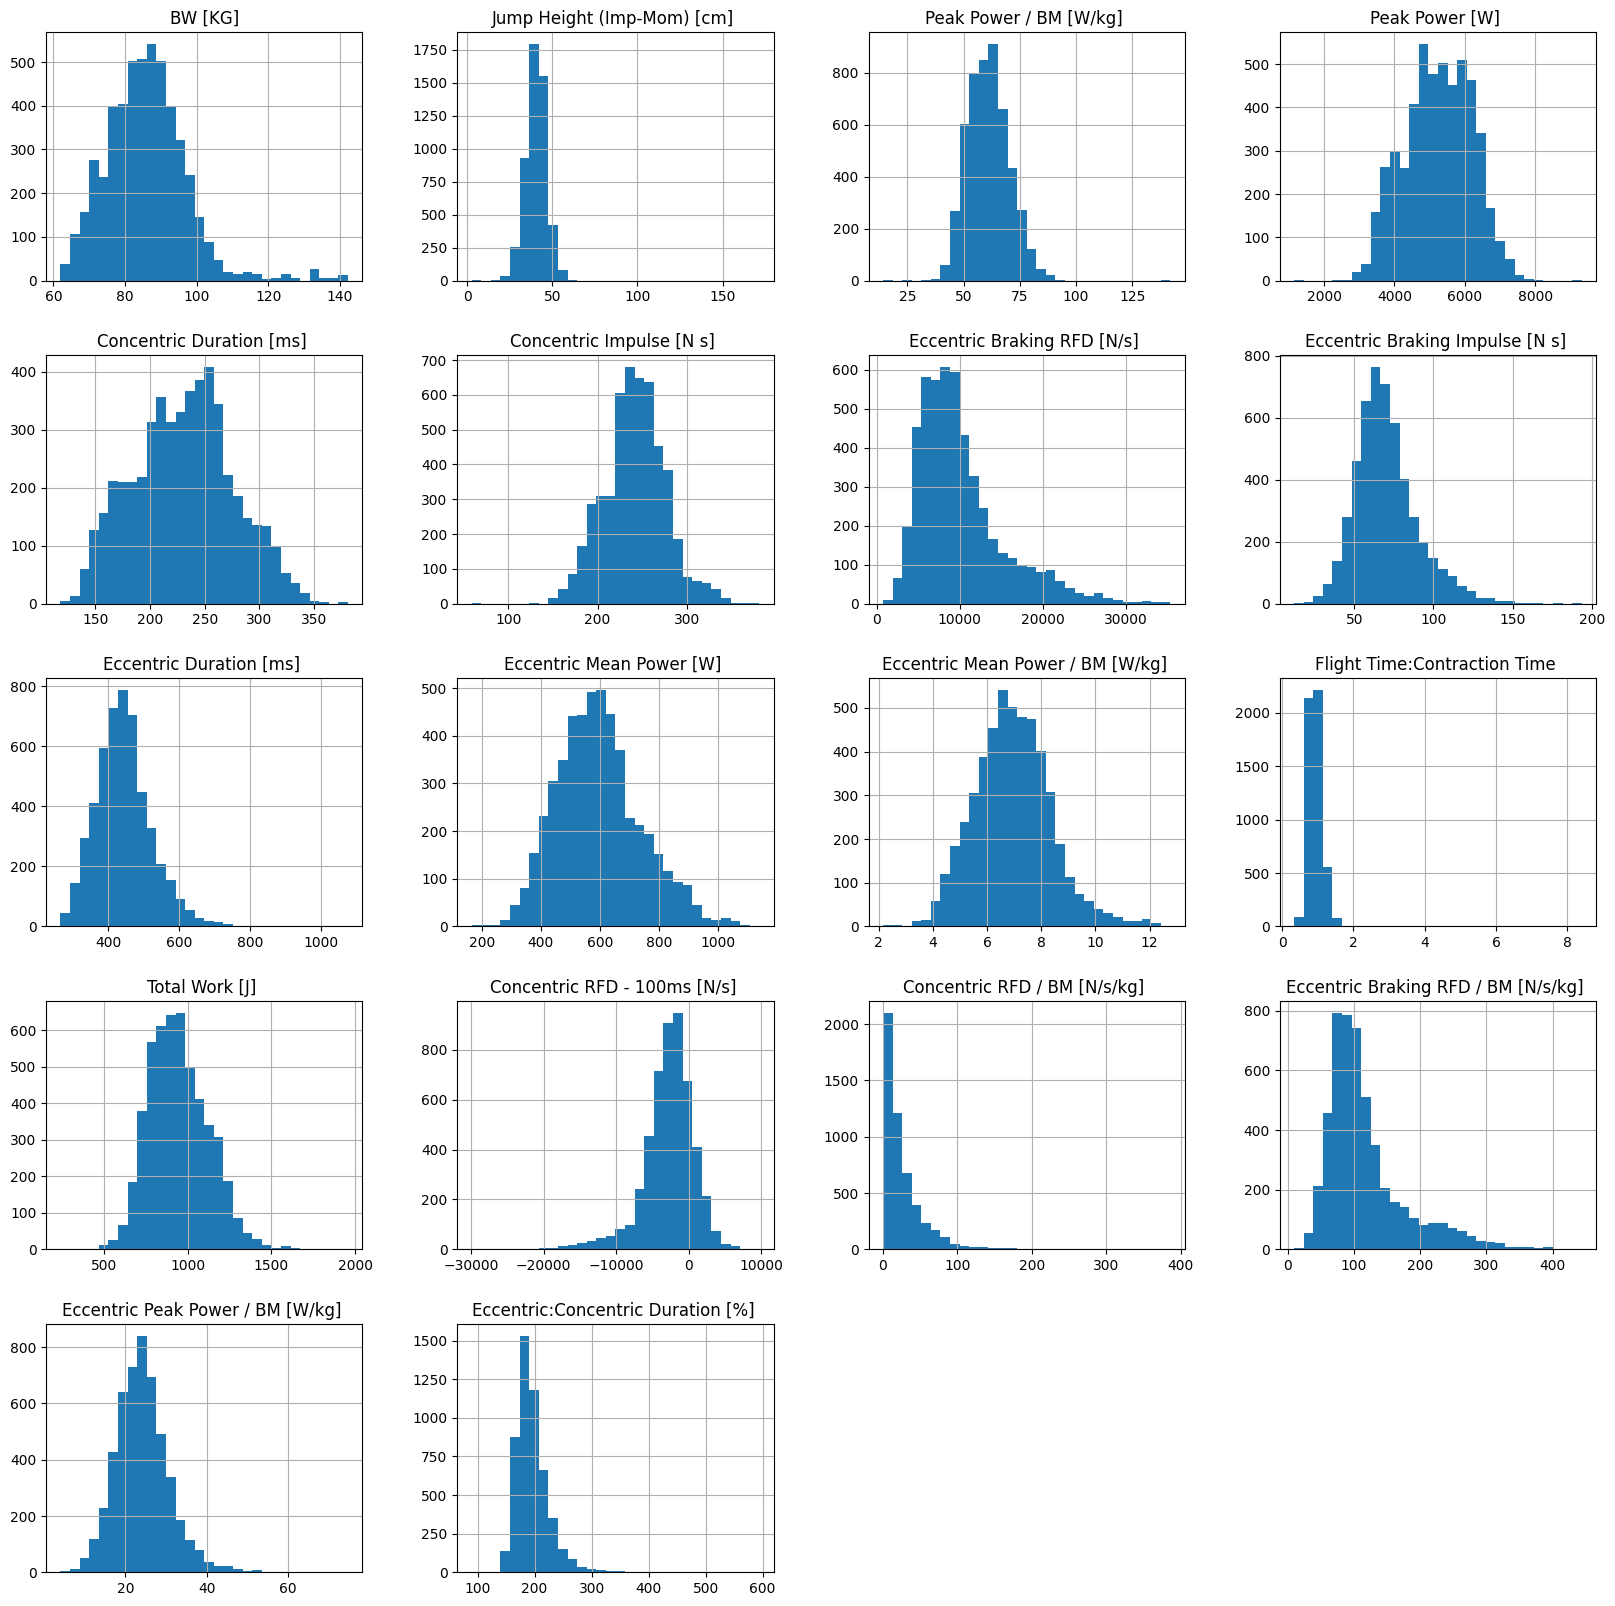

In [135]:
import matplotlib.pyplot as plt

df_new.hist(bins=30, figsize=(20, 20))
plt.show()

## Initial Histogram Visual Analysis
Visual anaylsis shows that the distribution of most features approximates a normal distribution, though there is a noticeable right skew in the eccentric and concentric features.

## Plot cultivated features vs. Peak Power / BM [W/kg]

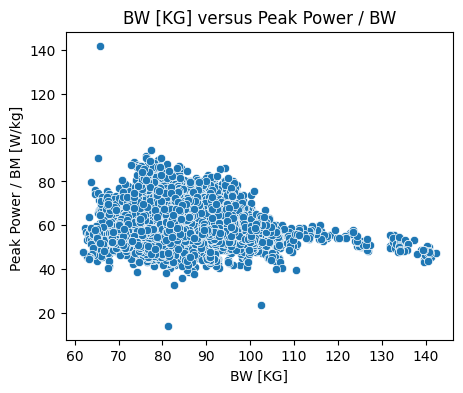

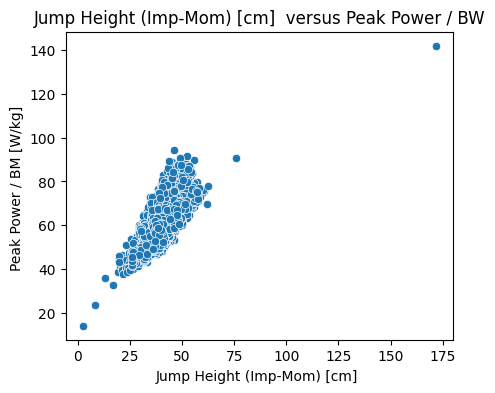

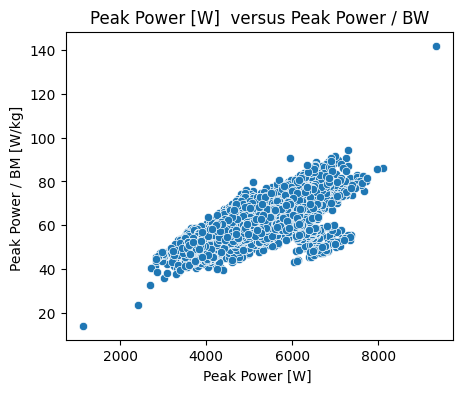

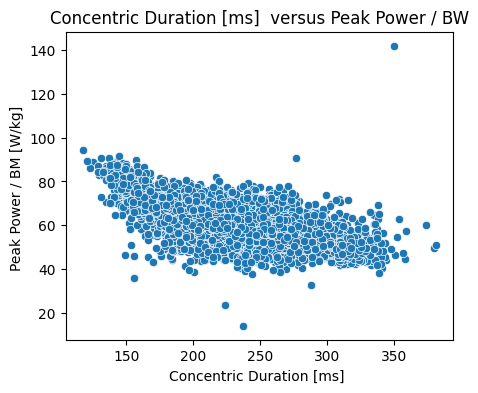

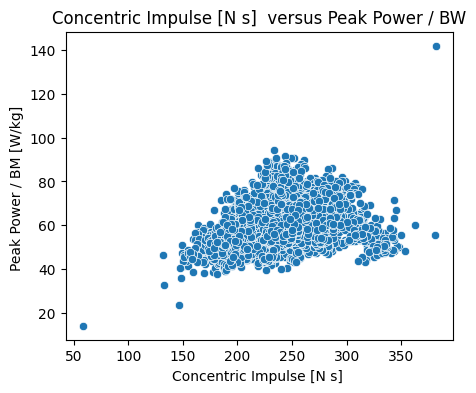

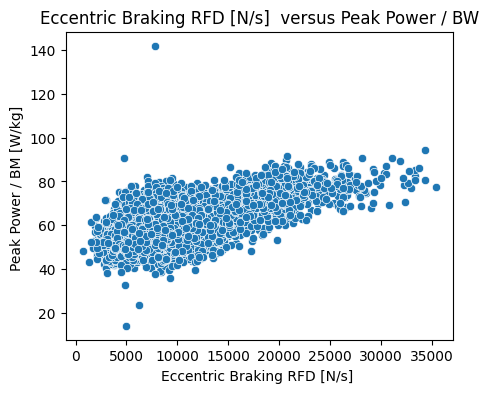

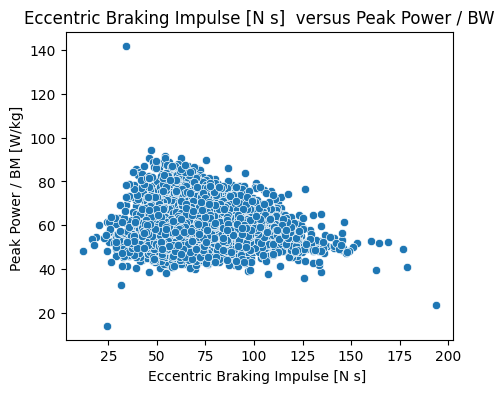

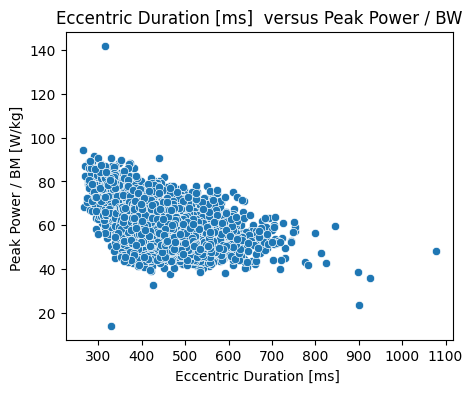

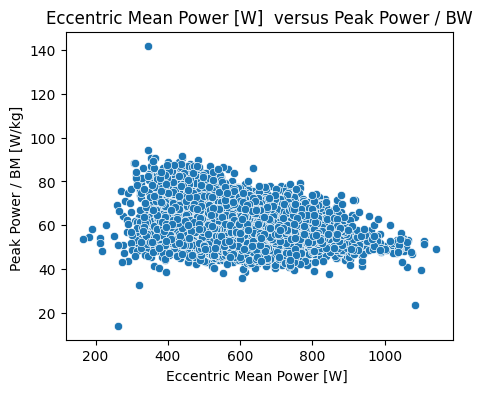

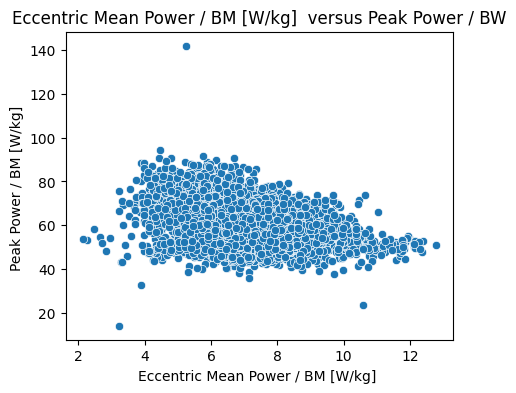

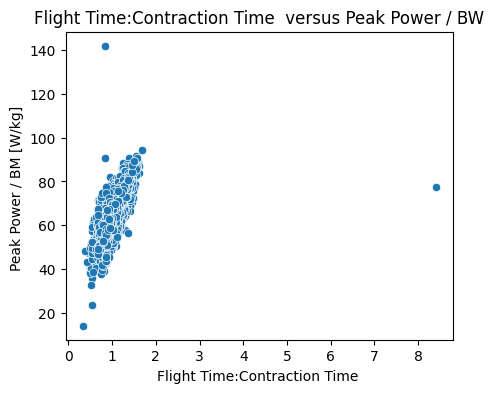

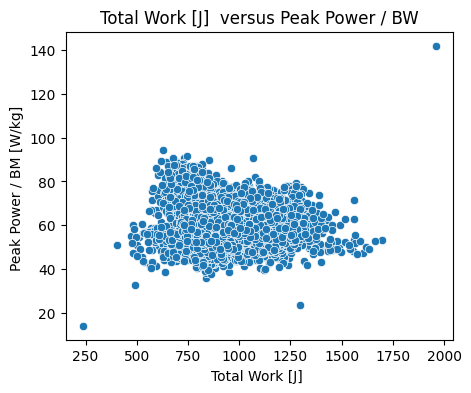

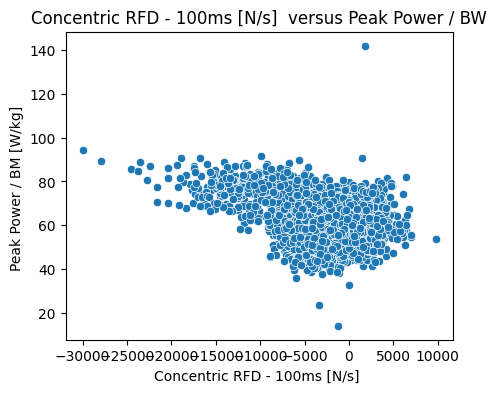

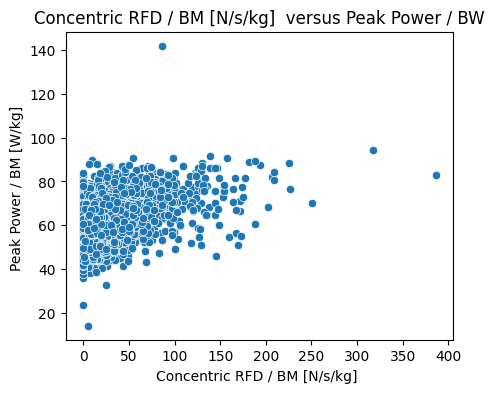

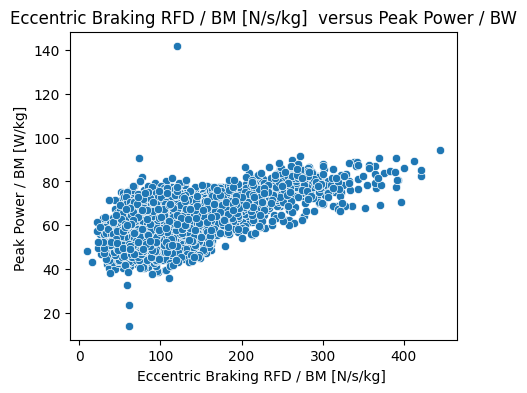

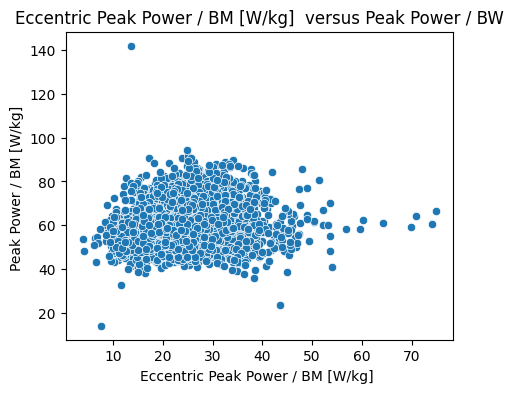

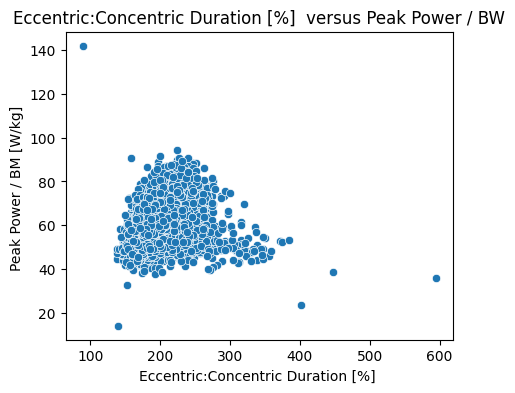

In [136]:
import seaborn as sns

for column in df_new.columns: # plot relationship between feature and target feature, "Peak Power / BW"
    if column != 'Peak Power / BM [W/kg] ':
        plt.figure(figsize=(5, 4))
        sns.scatterplot(data=df_new, x=column, y='Peak Power / BM [W/kg] ')
        plt.title(f'{column} versus Peak Power / BW')
        plt.show()

## Relationship Graph Analysis

* There is a strong positive relationship between Jump Height and Peak Power / BM [W/kg]. This is expected, as athletes that are able to generate more power compared to their body weight will most likely be able to jump higher.
* There is a slightly negative relationship between Concentric Duration and Peak Power / BM [W/kg], meaning that the higher concentric time an athlete has before they jump the less power they are generating per body weight.
* Eccentric breaking on the other hand seems to have a slight positive trend with Peak Power / BW, so the more the eccentric breaking value an athletes produce the slightly better Peak Power / BW they will produce.
* There seems to be a very high positive relationship between Peak Power / BW and "Flight Time: Contraction Time" but since I do not understand this feature too well so far I do not want to make any conclusions.  

## Display Correlation Matrix against Peak power / BM [W/kg]

For reference:

- Values that approach +1 indicate a strong positive linear relationship between the variables. They are represented by shades of red. A deeper red indicates a stronger negative relationship.
- Values that approach -1 indicate a strong negative linear relationship between the variables. They are represented by shades of blue. A deeper blue indicates a stronger negative relationship.
- Values near zero indicate no linear relationship between the variables. They are repesented by have a color close to white or a neutral shade.

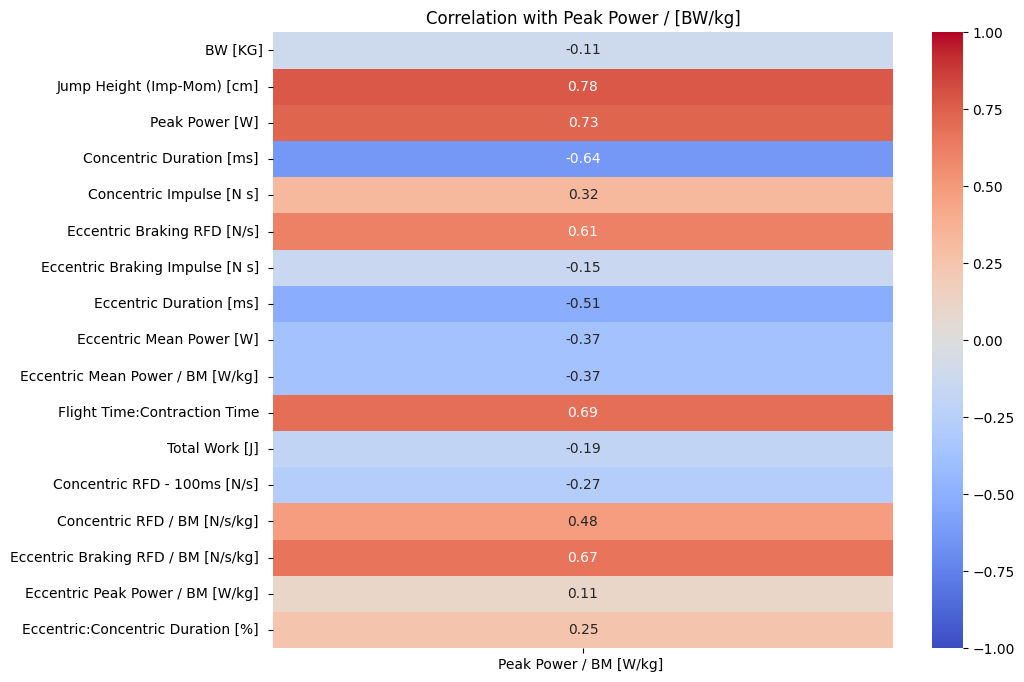

In [137]:
correlation_matrix = df_new.corr()

peak_power_correlation = correlation_matrix[["Peak Power / BM [W/kg] "]]

peak_power_correlation = peak_power_correlation.drop("Peak Power / BM [W/kg] ", errors='ignore')

plt.figure(figsize=(10, 8))
sns.heatmap(peak_power_correlation, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Peak Power / [BW/kg]")
plt.show()


In [138]:
squeezed_peak_power_correlation = peak_power_correlation.squeeze()

top_positive = squeezed_peak_power_correlation.sort_values(ascending=False).head(5)
top_negative = squeezed_peak_power_correlation.sort_values(ascending=True).head(5)

print("Top 5 Positive Correlations to Peak Power / [BW/kg]:")
print(top_positive)

Top 5 Positive Correlations to Peak Power / [BW/kg]:
Jump Height (Imp-Mom) [cm]              0.777066
Peak Power [W]                          0.732677
Flight Time:Contraction Time            0.694898
Eccentric Braking RFD / BM [N/s/kg]     0.667224
Eccentric Braking RFD [N/s]             0.614421
Name: Peak Power / BM [W/kg] , dtype: float64


In [139]:
print("\nTop 5 Negative Correlations to Peak Power / [BW/kg]:")
print(top_negative)


Top 5 Negative Correlations to Peak Power / [BW/kg]:
Concentric Duration [ms]            -0.638527
Eccentric Duration [ms]             -0.514237
Eccentric Mean Power / BM [W/kg]    -0.374023
Eccentric Mean Power [W]            -0.371699
Concentric RFD - 100ms [N/s]        -0.267414
Name: Peak Power / BM [W/kg] , dtype: float64


# Analysis

Graph, correlation, and data analysis tells us that Jump Height and Peak Power have the greatest positive linear relationship with Peak Power / BM [W/kg], where Concentric Duration and Eccentric Duration have the greatest negative linear relationship.

This might indicate that athletes training for endurance might have lower Peak Power / BM [W/kg] compared to athletes that train with quick movements.

## Split Data

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_new.drop('Peak Power / BM [W/kg] ', axis=1)
y = df_new['Peak Power / BM [W/kg] ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Define our linear regression and random forest regressor models

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfr.fit(X_train_scaled, y_train)

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

y_rfr_pred = model_rfr.predict(X_test_scaled)
rfr_mse = mean_squared_error(y_test, y_rfr_pred)
rfr_r2 = r2_score(y_test, y_rfr_pred)

print("Random Forest Regressor Mean Squared Error:", rfr_mse)
print("Random Forest Regressor R2 Score:", rfr_r2)

y_lr_pred = model_lr.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)

print("\nLinear Regression Mean Squared Error:", lr_mse)
print("Linear Regression R2 Score:", lr_r2)

Random Forest Regressor Mean Squared Error: 2.1336131143984196
Random Forest Regressor R2 Score: 0.9743724066070926

Linear Regression Mean Squared Error: 0.5033506453995654
Linear Regression R2 Score: 0.9939540746223832


# Metric Evaluation

Our Random Forest Regressor & Linear Regression R2 scores are very close to 1, which means that both regression models explain 97.44% and 99.39% of the variance in the target variable respectively.

The MSE of the Linear Regression model is *much* lower than the MSE of the Random Forest Regressor model, indicating it might have a better prediction accuracy.

# Plot Feature Importance of Random Forest Regressor Model

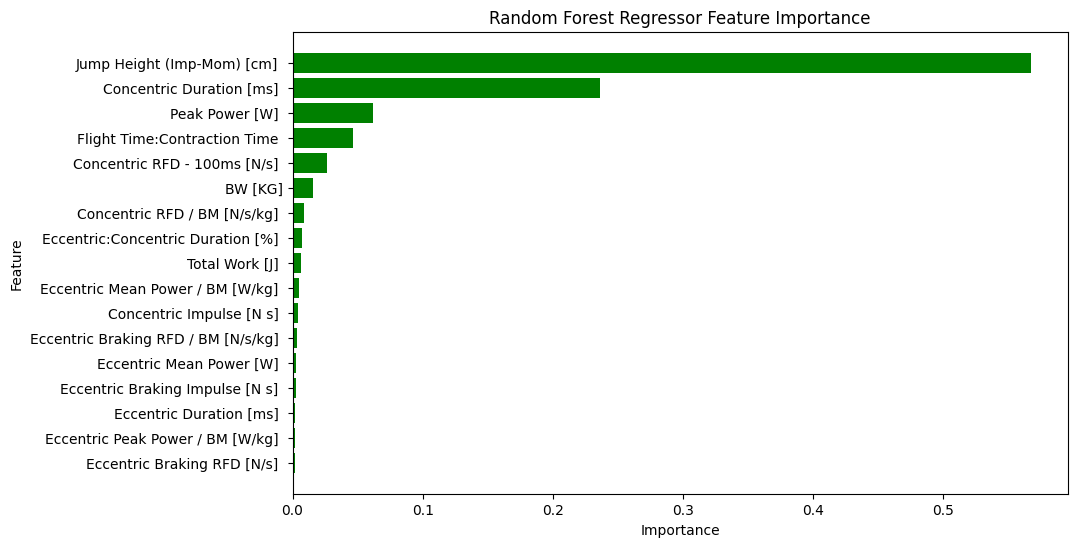

In [143]:
feature_importance_rfr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model_rfr.feature_importances_
})

feature_importance_rfr.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rfr['Feature'], feature_importance_rfr['Importance'], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.gca().invert_yaxis()
plt.show()


# Plot Feature Importance of Linear Regression Model

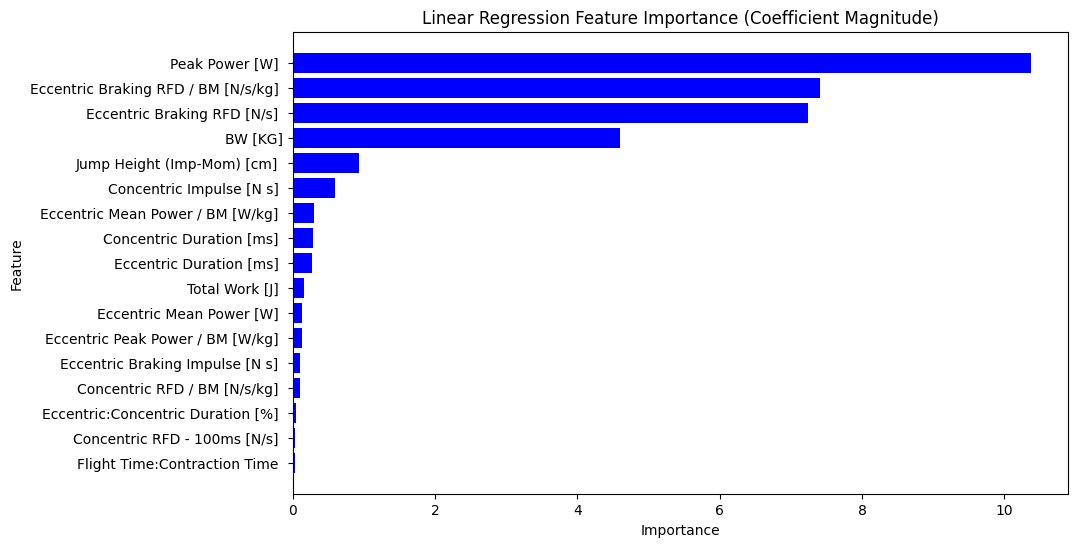

In [144]:
feature_importance_lr = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs(model_lr.coef_)
})

feature_importance_lr.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Linear Regression Feature Importance (Coefficient Magnitude)')
plt.gca().invert_yaxis()
plt.show()


## Print Coefficient Table

These coefficients are made by the LR model.

Positive coefficients indicate direct (positive) relationships between feature and our target feature - Peak Power / BM [W/kg].
Negative coefficients indicate inverse (negative) relationships between feature and our target feature - Peak Power / BM [W/kg].

In [147]:
coefficients = model_lr.coef_

feature_names = X_train.columns

coefficients_df = pd.DataFrame(data = {'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False, inplace=True)
print(coefficients_df)

                                 Feature  Coefficient
2                        Peak Power [W]     10.369849
14  Eccentric Braking RFD / BM [N/s/kg]      7.411632
5           Eccentric Braking RFD [N/s]     -7.244173
0                                BW [KG]    -4.605432
1            Jump Height (Imp-Mom) [cm]      0.937945
4              Concentric Impulse [N s]     -0.600424
9      Eccentric Mean Power / BM [W/kg]      0.297521
3              Concentric Duration [ms]     -0.294504
7               Eccentric Duration [ms]      0.278823
11                       Total Work [J]     -0.163914
8              Eccentric Mean Power [W]     -0.136084
15     Eccentric Peak Power / BM [W/kg]     -0.131037
6       Eccentric Braking Impulse [N s]     -0.099426
13         Concentric RFD / BM [N/s/kg]      0.098975
16    Eccentric:Concentric Duration [%]     -0.048217
12         Concentric RFD - 100ms [N/s]      0.040509
10         Flight Time:Contraction Time     -0.029418


# Feature Importance Analysis

Analysis of our feature importance charts tells us some very interesting things. Firstly, that the important features to our Random Forest Regressor model (RFR) model are **Jump Height (Imp-Mom) [cm]**, **Concentric Duration [m/s]**, and **Peak Power [W]**. Conversely, the important features to our Linear Regression model (LR) are **Peak Power [W]**, **Eccentric Braking RFD / BM [N/s/kg]**, and **Eccentric Braking RFD [N/s]**.

This is really interesting data. Looking at our LR coefficient table tells us that Peak Power [W] has a **very** strong (10) positive relationship to Peak Power / BM [W/kg], while Eccentric Braking RFD / BM [N/s/kg] also has a similarily strong (7.4) positive relationship to Peak Power / BM [W/kg]. The extremely interesting part of this is that the LR model says that Eccentric Braking RFD [N/s] has a strong (-7) **negative** relationship to Peak Power / BM.

RFRs ability to interpret non-linear relationships most likely explains why it chose Jump Height and Concentric Duration.

## Conclusions

Combining our results, we come to the surmisation that an athletes Peak Power / BM [W/kg] could be influenced by having the following metrics:

* **High** Eccentric Braking RFD / BM [N/s/kg] 
* **Low** Eccentric Braking RFD [N/s]
* **Low** Concentric Duration [ms]
* **High** Peak Power [W]

In plain terms, this means that an athlete who consistently trains near their 1RM (1 rep max) and has both a low concentric phase and high eccentric phase might have a higher Peak Power / BM [W/kg] then an athlete who doesn't.

As an example, lets consider a deadlift. We'll say that our athletes 1RM is near 315lbs. Our models show that to efficiently train Peak Power / BM [W/kg], they must pull up the weight very quickly (low concentric duration) and lower the weight very slowly (high eccentric braking RFD / BM).

In terms of the context of our specific problem, this might mean that an athlete who trains their jump at extremely heavy weights more often then an athlete who trains at a lower weight with more endurance could have a higher Peak Power / BM [W/kg] then the latter.